# עבודת גמר הדמיית נתונים

In [1]:
import numpy as np
import random 
import math   
import pandas as pd
from pandas import DataFrame
import glob
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier

## חלק ראשון:


In [5]:
# https://www.kaggle.com/mirichoi0218/insurance

In [6]:
df = pd.read_csv(r'C:\Users\user\Desktop\Exel files\insurance.csv')

In [7]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
236,18,female,26.730,0,no,southeast,1615.76670
268,45,male,30.200,1,no,southwest,7441.05300
1198,40,male,29.355,1,no,northwest,6393.60345
1163,18,female,28.215,0,no,northeast,2200.83085
985,44,female,25.800,1,no,southwest,7624.63000
36,62,female,32.965,3,no,northwest,15612.19335
65,19,female,28.900,0,no,southwest,1743.21400
627,33,male,42.460,1,no,southeast,11326.71487
977,26,male,29.150,1,no,southeast,2902.90650
169,27,male,18.905,3,no,northeast,4827.90495


## bmi is: Body Mass Index

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


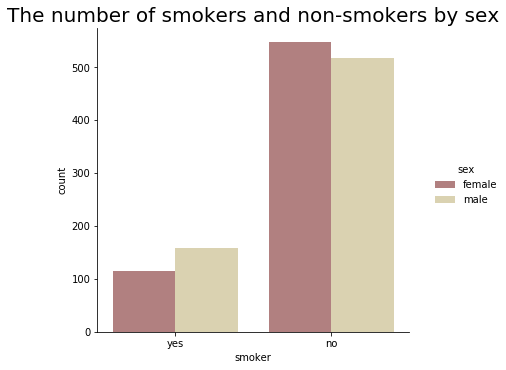

In [9]:
sns.catplot(x="smoker", kind="count",hue ='sex', palette="pink", data=df)
plt.gca().set_title('The number of smokers and non-smokers by sex', fontsize=20)
plt.show()

In [10]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


## wow!!

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\legend.py:640: UserWarning: Unrecognized location "upper rigth". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


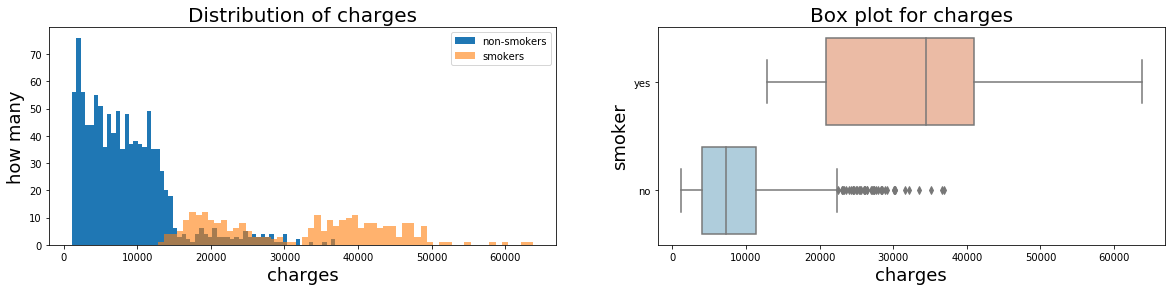

In [11]:
f= plt.figure(figsize=(20,4))
ax=f.add_subplot(121)
plt.hist(df[(df.smoker == 'no')]['charges'], bins=60, label='non-smokers' )
plt.hist(df[(df.smoker == 'yes')]["charges"], bins=60, label='smokers', alpha = 0.6)
plt.gca().set_title('Distribution of charges', fontsize=20)
plt.xlabel("charges", fontsize=18)
plt.ylabel("how many", fontsize=18) 
plt.legend(loc='upper rigth')

ax=f.add_subplot(122)
plt.title("Box plot for charges", loc='Center', fontsize=20)
sns.boxplot(y="smoker", x="charges", data = df , orient="h", palette ='RdBu')
plt.xlabel("charges", fontsize=18)
plt.ylabel("smoker", fontsize=18)
plt.show()

In [12]:
print('There are '+str(len(df[df.smoker == 'yes'][df["charges"] > 30000] ))
      +' peopel from '+str(len(df[df.smoker == 'yes']))+' that smoke and their charges haier then 30,000,'
     +'\nbut there are '+str(len(df[df.smoker == 'no'][df["charges"] > 30000] ))
      +' peopel from '+str(len(df[df.smoker == 'no']))+' that dont smoke and their charges haier then 30,000.')

There are 152 peopel from 274 that smoke and their charges haier then 30,000,
but there are 10 peopel from 1064 that dont smoke and their charges haier then 30,000.


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [13]:
df.groupby(['region','sex','smoker'])['bmi'].describe()

count       mean       std     min       25%  \
region    sex    smoker                                                 
northeast female no      132.0  29.777462  6.063551  16.815  25.17500   
                 yes      29.0  27.261724  7.225644  17.195  21.75500   
          male   no      125.0  28.861760  5.637830  15.960  25.17500   
                 yes      38.0  29.560000  5.186862  17.290  26.48125   
northwest female no      135.0  29.488704  5.425615  18.050  25.84000   
                 yes      29.0  28.296897  4.829656  17.765  24.70000   
          male   no      132.0  28.930379  5.026714  17.385  25.43625   
                 yes      29.0  29.983966  4.547572  22.895  27.36000   
southeast female no      139.0  32.780000  5.900382  20.790  28.21500   
                 yes      36.0  32.251389  6.819129  22.220  26.73000   
          male   no      134.0  34.129552  6.638994  20.350  30.03000   
                 yes      55.0  33.650000  7.152327  19.800  29.04000   
southwest female no      141.0  30.050355  5.666375  17.400  25.90000   
                 yes      21.0  30.128571  6.530937  18.300  26.70000   
          male   no      126.0  31.019841  5.832489  19.800  27.25000   
                 yes      37.0  31.502703  4.704046  19.300  27.80000   

                             50%       75%     max  
region    sex    smoker                             
northeast female no      30.1150  33.17875  48.070  
                 yes     25.2700  34.96000  42.750  
          male   no      28.3100  32.30000  42.655  
                 yes     30.3050  32.22875  41.895  
northwest female no      29.7350  33.25000  42.940  
                 yes     28.3100  30.49500  38.950  
          male   no      29.1175  32.22875  41.325  
                 yes     28.5000  33.63000  40.565  
southeast female no      32.2300  37.56500  46.750  
                 yes     31.7350  37.15250  47.410  
          male   no      33.8250  38.06000  53.130  
                 yes     35.0900  38.11500  52.580  
southwest female no      29.6000  33.40000  46.700  
                 yes     31.3000  33.80000  47.600  
          male   no      30.5000  35.37500  45.900  
                 yes     32.7000  35.30000  39.900

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


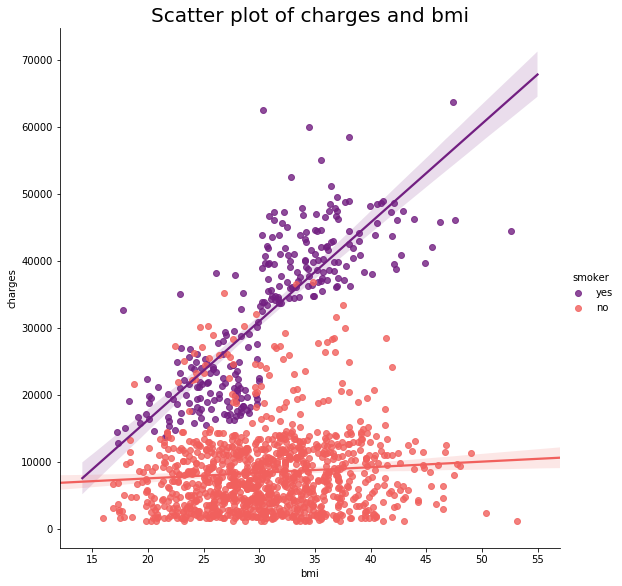

In [14]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)
plt.gca().set_title('Scatter plot of charges and bmi', fontsize=20)
plt.show()

In [15]:
df['health'] = 0
df['health'][(df.bmi > 30)] = 1

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


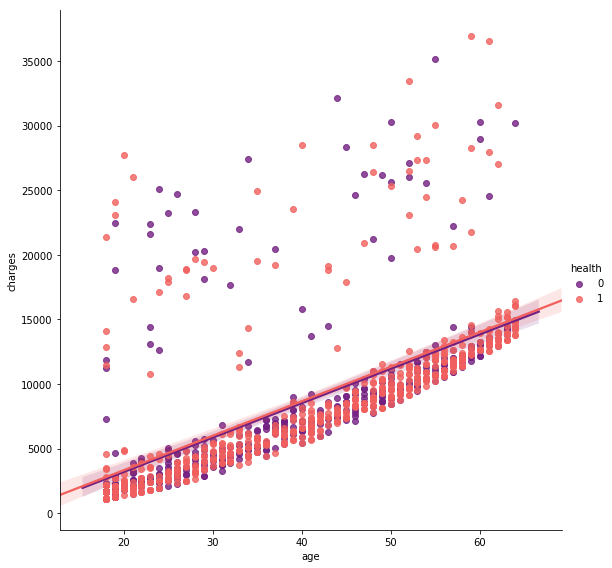

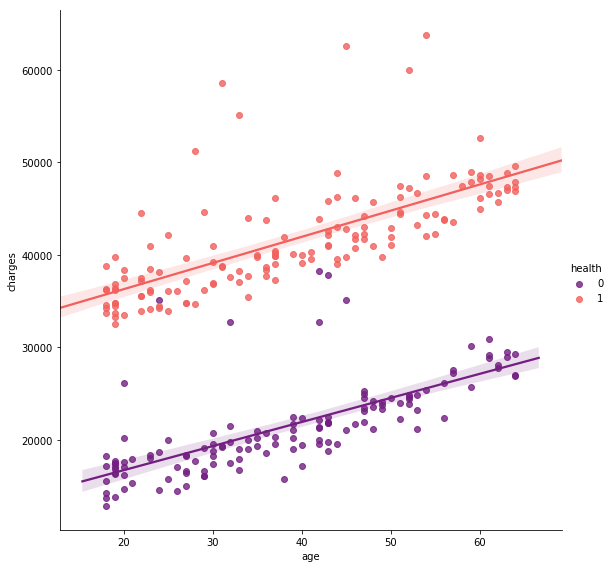

In [16]:
sns.lmplot(x="age", y="charges", hue='health', data=df[df["smoker"]== 'no'], palette = 'magma', size = 8)
sns.lmplot(x="age", y="charges", hue='health', data=df[df["smoker"]== 'yes'], palette = 'magma', size = 8)

In [17]:
df[(df['bmi'] < 18) | (df['bmi'] >= 40)].head()

,age,sex,bmi,children,smoker,region,charges,health
14,27,male,42.130,0,yes,southeast,39611.75770,1
18,56,male,40.300,0,no,southwest,10602.38500,1
28,23,male,17.385,1,no,northwest,2775.19215,0
83,48,female,41.230,4,no,northwest,11033.66170,1
116,58,male,49.060,0,no,southeast,11381.32540,1


In [18]:
df['sex'] = df['sex'].map({'male': 0,'female': 1 })
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4})

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health
0,19,1,27.900,0,1,4,16884.92400,0
1,18,0,33.770,1,0,3,1725.55230,1
2,28,0,33.000,3,0,3,4449.46200,1
3,33,0,22.705,0,0,2,21984.47061,0
4,32,0,28.880,0,0,2,3866.85520,0


In [20]:
x = df.drop('charges', axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [21]:
get_precnt = lambda x: str(x*10000//1/100)+'%'

In [22]:
LR = LinearRegression().fit(x_train, y_train)
print('LR Accuracy:',get_precnt(LR.score(x_test,y_test)))

LR Accuracy: 79.61%


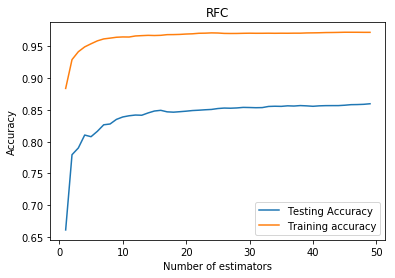

RFR Accuracy: 85.97%


In [23]:
estimators = np.arange(1,50)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    RFR = RandomForestRegressor(n_estimators=k, random_state=4)
    RFR.fit(x_train, y_train)
    train_accuracy[i] = RFR.score(x_train, y_train)
    test_accuracy[i] = RFR.score(x_test, y_test)
    
plt.title('RFC')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('RFR Accuracy:',get_precnt(test_accuracy.max()))

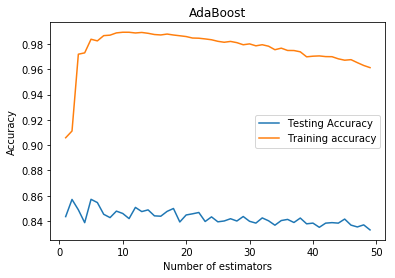

AdaBoost with RFR Accuracy: 85.72%


In [24]:
estimators = np.arange(1,50)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    AdaBoost = AdaBoostRegressor(RandomForestRegressor( random_state=4 ) , n_estimators=k)
    AdaBoost.fit(x_train, y_train) 
    train_accuracy[i] = AdaBoost.score(x_train, y_train)
    test_accuracy[i] = AdaBoost.score(x_test, y_test) 
plt.title('AdaBoost')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('AdaBoost with RFR Accuracy:',get_precnt(test_accuracy.max()))

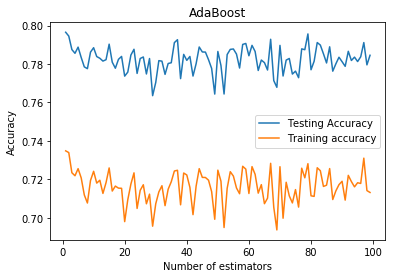

AdaBoost with LR Accuracy: 79.65% with  0  estimators.


In [25]:
estimators = np.arange(1,100)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    AdaBoost = AdaBoostRegressor(LinearRegression(), n_estimators=k)
    AdaBoost.fit(x_train, y_train) 
    train_accuracy[i] = AdaBoost.score(x_train, y_train)
    test_accuracy[i] = AdaBoost.score(x_test, y_test)
plt.title('AdaBoost')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('AdaBoost with LR Accuracy:',get_precnt(test_accuracy.max()),'with ',str(test_accuracy.argmax()),' estimators.')

LR Accuracy: 90.72%
RFR Accuracy: 87.32%


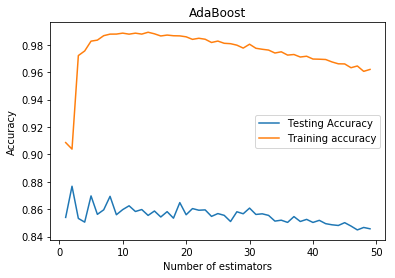

AdaBoost with RFR Accuracy: 87.67% with  1  estimators.


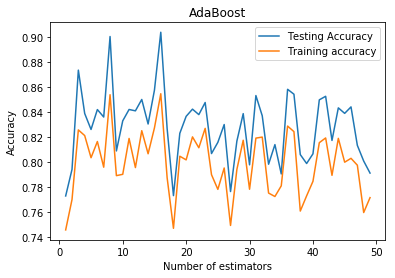

AdaBoost with LR Accuracy: 90.37% with  15  estimators.


In [26]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x.copy())
x_quad_train, x_quad_test, y_train, y_test = train_test_split(x_quad, y.copy(), random_state=0)

LR = LinearRegression().fit(x_quad_train,y_train)
print('LR Accuracy:',get_precnt(LR.score(x_quad_test,y_test)))

RFR = RandomForestRegressor(n_estimators=38, random_state=2).fit(x_quad_train, y_train)
print('RFR Accuracy:',get_precnt(RFR.score(x_quad_test, y_test)))

estimators = np.arange(1,50)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    AdaBoost = AdaBoostRegressor(RandomForestRegressor( random_state=4 ) , n_estimators=k)
    AdaBoost.fit(x_quad_train, y_train) 
    train_accuracy[i] = AdaBoost.score(x_quad_train, y_train)
    test_accuracy[i] = AdaBoost.score(x_quad_test, y_test) 
plt.title('AdaBoost')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('AdaBoost with RFR Accuracy:',get_precnt(test_accuracy.max()),'with ',str(test_accuracy.argmax()),' estimators.')

estimators = np.arange(1,50)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    AdaBoost = AdaBoostRegressor(LinearRegression() , n_estimators=k)
    AdaBoost.fit(x_quad_train, y_train) 
    train_accuracy[i] = AdaBoost.score(x_quad_train, y_train)
    test_accuracy[i] = AdaBoost.score(x_quad_test, y_test)
plt.title('AdaBoost')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('AdaBoost with LR Accuracy:',get_precnt(test_accuracy.max()),'with ',str(test_accuracy.argmax()),' estimators.')

In [27]:
pca = PCA()
pca.fit(x_quad_train)
x_quad_train = pca.transform(x_quad_train)
x_quad_test = pca.transform(x_quad_test)

LR Accuracy: 90.72%
RFR Accuracy: 87.25%


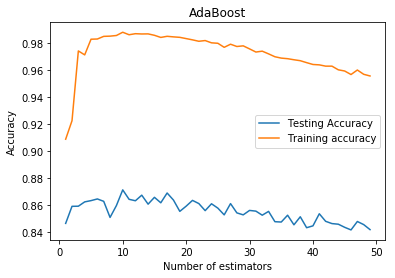

AdaBoost with RFR Accuracy: 87.13% with  9  estimators.


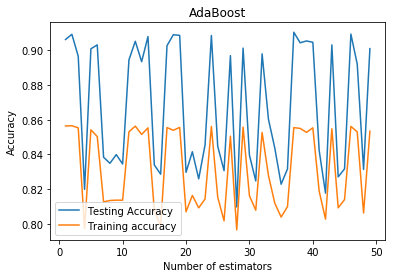

AdaBoost with LR Accuracy: 91.03% with  36  estimators.


In [28]:
LR = LinearRegression().fit(x_quad_train,y_train)
print('LR Accuracy:',get_precnt(LR.score(x_quad_test,y_test)))

RFR = RandomForestRegressor(n_estimators=38, random_state=2).fit(x_quad_train, y_train)
print('RFR Accuracy:',get_precnt(RFR.score(x_quad_test, y_test)))

estimators = np.arange(1,50)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    AdaBoost = AdaBoostRegressor(RandomForestRegressor( random_state=4 ) , n_estimators=k)
    AdaBoost.fit(x_quad_train, y_train) 
    train_accuracy[i] = AdaBoost.score(x_quad_train, y_train)
    test_accuracy[i] = AdaBoost.score(x_quad_test, y_test) 
plt.title('AdaBoost')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('AdaBoost with RFR Accuracy:',get_precnt(test_accuracy.max()),'with ',str(test_accuracy.argmax()),' estimators.')

estimators = np.arange(1,50)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    AdaBoost = AdaBoostRegressor(LinearRegression() , n_estimators=k)
    AdaBoost.fit(x_quad_train, y_train) 
    train_accuracy[i] = AdaBoost.score(x_quad_train, y_train)
    test_accuracy[i] = AdaBoost.score(x_quad_test, y_test)
plt.title('AdaBoost')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('AdaBoost with LR Accuracy:',get_precnt(test_accuracy.max()),'with ',str(test_accuracy.argmax()),' estimators.')

In [29]:
from sklearn.metrics import mean_squared_error
a = np.empty(len(df))
for i in range(len(df)):
    a[i] = df.charges.mean()
print('The mean squared error of model 0 is: ',mean_squared_error(a, y))
print('The mean squared error of my best LR model is: ',mean_squared_error(LR.predict(x_quad_test), y_test))

The mean squared error of model 0 is:  146542766.49354792
The mean squared error of my best LR model is:  14603374.48823473


## Well I think I am not bad ;)

## חלק שני:


In [30]:
training_path = r'C:\Users\user\Desktop\Exel files\semester_2_final\Training'

In [31]:
Evyatar_Cohen_Spontan = '\Evyatar Cohen\Evyatar636771052727603804Spontan.csv'
Evyatar_Cohen_Sync = '\Evyatar Cohen\Evyatar636771053639929594Sync.csv'
Evyatar_Cohen_Alone = '\Evyatar Cohen\Evyatar636771054555711409Alone.csv'

In [32]:
Namecunter = 0

In [33]:
df1 = pd.read_csv(training_path+Evyatar_Cohen_Alone)
df2 = pd.read_csv(training_path+Evyatar_Cohen_Sync)
df3 = pd.read_csv(training_path+Evyatar_Cohen_Spontan)

df1['Name'] = df2['Name'] = df3['Name'] = Namecunter
Namecunter = Namecunter+1
df1['Experiment Mode'] = 0 #'Alone'
df2['Experiment Mode'] = 1 #'Sync'
df3['Experiment Mode'] = 2 #'Spontan'

In [34]:
Nofar_Social_Nuero_Alone = r'\Nofar Social_Nuero\Nofar636759796290435160Alone.csv'
df4 = pd.read_csv(training_path+Nofar_Social_Nuero_Alone)
df4['Name'] = 2
df4['Experiment Mode'] = 0 #'Alone'

In [35]:
HandRight_path = r'C:\Users\user\Desktop\Exel files\semester_2_final\HandRight.csv'
HandRight = pd.read_csv(HandRight_path)
HandRight0 = HandRight.copy()

In [36]:
columns = ['Time', ' Frame ID', ' # hands', 'Name', 'Experiment Mode',
            'Left Position X','Left Position Y', 'Left Position Z', 'Left Velocity X', 'Left Velocity Y',
            'Left Velocity Z', 'Left Pitch', 'Left Roll', 'Left Yaw', 'Left Wrist Pos X',
            'Left Wrist Pos Y', 'Left Wrist Pos Z', 'Left Elbow pos X', 'Left Elbow Pos Y',
            'Left Elbow Pos Z', 'Left Grab Strenth', 'Left Grab Angle', 'Left Pinch Strength',
            'Right Position X','Right Position Y', 'Right Position Z', 'Right Velocity X', 'Right Velocity Y',
            'Right Velocity Z', 'Right Pitch', 'Right Roll', 'Right Yaw', 'Right Wrist Pos X',
            'Right Wrist Pos Y', 'Right Wrist Pos Z', 'Right Elbow pos X', 'Right Elbow Pos Y',
            'Right Elbow Pos Z', 'Right Grab Strenth', 'Right Grab Angle', 'Right Pinch Strength']
columns0 = ['Time', ' Frame ID',  ' # hands','Name', 'Experiment Mode']

columns1 = [' Position X',' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
           ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
           ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
           ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength']
columns2 = [['Time', ' Frame ID', ' Hand Type', ' # hands','Name', 'Experiment Mode',
            ' Position X',' Position X', ' Position Y',' Position Y', ' Position Z',' Position Z',
             ' Velocity X',' Velocity X', ' Velocity Y',' Velocity Y',  ' Velocity Z', ' Velocity Z', 
             ' Pitch',' Pitch', ' Roll',' Roll', ' Yaw',' Yaw', ' Wrist Pos X',' Wrist Pos X',
             ' Wrist Pos Y',' Wrist Pos Y', ' Wrist Pos Z',' Wrist Pos Z', ' Elbow pos X',' Elbow pos X', 
             ' Elbow Pos Y',' Elbow Pos Y',' Elbow Pos Z',' Elbow Pos Z', ' Grab Strenth',' Grab Strenth', 
             ' Grab Angle', ' Grab Angle', ' Pinch Strength',' Pinch Strength'],
            [' ',' ',' ',' ',' ',' ',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right']]

In [37]:
def nogg(df):
    df = df.reset_index()
    df = df.drop(['index'],axis=1)
    return df

In [38]:
df1.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,Name,Experiment Mode
0,518.8087,149620,left,1,-97.60160,164.1213,42.81255,104.2589,-491.6730,-55.42755,...,164.8320,27.58547,-378.1662,65.89330,-69.90282,0.0,0.741855,0.0,0,0
1,518.8252,149622,left,1,-95.78062,157.6353,42.18084,148.9683,-351.7386,-36.32422,...,155.6419,29.71037,-380.3233,52.92441,-55.71872,0.0,0.827916,0.0,0,0
2,518.8418,149623,left,1,-94.39360,154.6338,41.93171,161.6958,-349.9117,-29.04277,...,151.5701,31.05059,-381.7444,48.55032,-47.27909,0.0,0.920401,0.0,0,0
3,518.8587,149625,left,1,-92.02553,150.6723,42.10119,117.3475,-187.1781,24.42598,...,144.6214,33.94577,-383.4688,40.27151,-30.72728,0.0,1.034603,0.0,0,0
4,518.8749,149627,left,1,-89.31953,148.1826,42.67065,155.3344,-135.6337,35.87055,...,138.6087,36.68195,-381.0906,29.07133,-17.01065,0.0,1.166705,0.0,0,0


In [39]:
columnsdf1 = df1.columns
def get_Alone_df(new_df):
    tempdf0 = DataFrame(columns=columnsdf1)
    tempdf0 = tempdf0.append(new_df[new_df[' Hand Type']=='left'])
    tempdf0 = tempdf0.reset_index()
    del tempdf0['index']

    ezhafe = DataFrame(columns=columns2)
    tempdf = DataFrame(columns=columnsdf1)
    tempdf = tempdf.append(new_df)
    tempdf = tempdf.reset_index()
    del tempdf['index']
    for x in columns1:
        ezhafe[x] = tempdf[x]
    for x in columns1:
        ezhafe[x,'Right'] = HandRight0[x].copy()
    for x in columns0:
        ezhafe[x,' '] = tempdf0[x]

    final_df = DataFrame(ezhafe, columns=ezhafe.columns)
    final_df = DataFrame(final_df, columns=[['Time', ' Frame ID', ' # hands', 'Name', 'Experiment Mode',
            ' Position X',' Position X', ' Position Y',' Position Y', ' Position Z',' Position Z',
             ' Velocity X',' Velocity X', ' Velocity Y',' Velocity Y',  ' Velocity Z', ' Velocity Z', 
             ' Pitch',' Pitch', ' Roll',' Roll', ' Yaw',' Yaw', ' Wrist Pos X',' Wrist Pos X',
             ' Wrist Pos Y',' Wrist Pos Y', ' Wrist Pos Z',' Wrist Pos Z', ' Elbow pos X',' Elbow pos X', 
             ' Elbow Pos Y',' Elbow Pos Y',' Elbow Pos Z',' Elbow Pos Z', ' Grab Strenth',' Grab Strenth', 
             ' Grab Angle', ' Grab Angle', ' Pinch Strength',' Pinch Strength'],#42
            [' ',' ',' ',' ',' ',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right']])

    final_df = final_df[final_df.index%20==0]
    final_df = final_df[final_df.index>=700]
    final_df = nogg(final_df)
    final_df = final_df
    return final_df

In [40]:
df1 = get_Alone_df(df1)

In [41]:
df1.head(3)

Time  Frame ID  # hands Name Experiment Mode  Position X             \
                                                           Left      Right   
0  530.4075    150957        1    0               0   -62.14016  27.550410   
1  530.7388    150995        1    0               0   -65.60078  59.588350   
2  531.0707    151034        1    0               0   -58.67621  -1.415332   

   Position Y            Position Z  ...   Elbow Pos Y            Elbow Pos Z  \
         Left     Right        Left  ...          Left     Right         Left   
0    176.4449  232.7543    27.85700  ...      95.06994  52.26681    -3.509623   
1    289.7090  187.0016    13.32176  ...     138.38280  45.36940   -59.364530   
2    210.1751  184.4684    19.96792  ...     148.79210  51.53496   -62.265350   

             Grab Strenth        Grab Angle            Pinch Strength        
      Right          Left Right        Left     Right            Left Right  
0  287.7588           0.0   0.0    0.000000  0.498644             0.0   0.0  
1  349.5035           0.0   0.0    0.724544  0.594971             0.0   0.0  
2  327.9102           0.0   0.0    0.498183  0.556560             0.0   0.0  

[3 rows x 41 columns]

In [42]:
HandRight0 = nogg(HandRight0.iloc[1:])

In [43]:
df4 = get_Alone_df(df4)

In [44]:
df4.head(3)

Time  Frame ID  # hands Name Experiment Mode  Position X             \
                                                           Left      Right   
0  507.6639     59523        1    2               0   -54.17390  33.196470   
1  507.9956     59561        1    2               0   -39.51262  55.423450   
2  508.3267     59599        1    2               0   -33.47280  -1.874014   

   Position Y            Position Z  ...   Elbow Pos Y            Elbow Pos Z  \
         Left     Right        Left  ...          Left     Right         Left   
0    404.6508  237.5320   102.53100  ...     264.48880  51.28829    22.379220   
1    259.0963  182.1599    66.94943  ...     123.27050  43.29059    -6.323922   
2    162.3875  187.7745    65.01147  ...      89.21803  48.40028    22.184030   

             Grab Strenth        Grab Angle            Pinch Strength        
      Right          Left Right        Left     Right            Left Right  
0  287.5629           0.0   0.0    0.993057  0.520795             0.0   0.0  
1  351.3723           0.0   0.0    0.104894  0.638669             0.0   0.0  
2  325.0872           0.0   0.0    0.000000  0.562597             0.0   0.0  

[3 rows x 41 columns]

In [45]:
df4.drop([' # hands'], 1).columns.values

array([('Time', ' '), (' Frame ID', ' '), ('Name', ' '),
       ('Experiment Mode', ' '), (' Position X', 'Left'),
       (' Position X', 'Right'), (' Position Y', 'Left'),
       (' Position Y', 'Right'), (' Position Z', 'Left'),
       (' Position Z', 'Right'), (' Velocity X', 'Left'),
       (' Velocity X', 'Right'), (' Velocity Y', 'Left'),
       (' Velocity Y', 'Right'), (' Velocity Z', 'Left'),
       (' Velocity Z', 'Right'), (' Pitch', 'Left'), (' Pitch', 'Right'),
       (' Roll', 'Left'), (' Roll', 'Right'), (' Yaw', 'Left'),
       (' Yaw', 'Right'), (' Wrist Pos X', 'Left'),
       (' Wrist Pos X', 'Right'), (' Wrist Pos Y', 'Left'),
       (' Wrist Pos Y', 'Right'), (' Wrist Pos Z', 'Left'),
       (' Wrist Pos Z', 'Right'), (' Elbow pos X', 'Left'),
       (' Elbow pos X', 'Right'), (' Elbow Pos Y', 'Left'),
       (' Elbow Pos Y', 'Right'), (' Elbow Pos Z', 'Left'),
       (' Elbow Pos Z', 'Right'), (' Grab Strenth', 'Left'),
       (' Grab Strenth', 'Right'), (' Grab A

In [46]:
def get_Spontan_or_Sync_df(new_df):
    hardhafe = DataFrame(columns=columns2)
    tempdf = DataFrame(columns=new_df.columns)
    tempdf = tempdf.append(new_df)
    tempdf = tempdf.reset_index()
    del tempdf['index']

    temp = tempdf[tempdf[' Hand Type']=='left']
    temp = temp.reset_index()
    del temp['index']
    for x in columns1:
        hardhafe[x] = temp[x]
        hardhafe[x,'Right'] = np.nan
    for x in columns0:
        hardhafe[x,' '] = temp[x]
    temp = tempdf[tempdf[' Hand Type'] == 'right']
    temp = temp.reset_index()
    del temp['index']
    for x in columns1:
        hardhafe[x,'Right'] = temp[x]
    for x in columns0:
        hardhafe[x,' '] = temp[x]
    hardhafe = hardhafe.drop(columns=[' Hand Type'])
    final_df = DataFrame(hardhafe,columns=hardhafe.columns)
    final_df = final_df.reset_index()
    del final_df['index']
    final_df = DataFrame(final_df,columns=[['Time', ' Frame ID', ' # hands', 'Name', 'Experiment Mode',
                ' Position X',' Position X', ' Position Y',' Position Y', ' Position Z',' Position Z',
                 ' Velocity X',' Velocity X', ' Velocity Y',' Velocity Y',  ' Velocity Z', ' Velocity Z', 
                 ' Pitch',' Pitch', ' Roll',' Roll', ' Yaw',' Yaw', ' Wrist Pos X',' Wrist Pos X',
                 ' Wrist Pos Y',' Wrist Pos Y', ' Wrist Pos Z',' Wrist Pos Z', ' Elbow pos X',' Elbow pos X', 
                 ' Elbow Pos Y',' Elbow Pos Y',' Elbow Pos Z',' Elbow Pos Z', ' Grab Strenth',' Grab Strenth', 
                 ' Grab Angle', ' Grab Angle', ' Pinch Strength',' Pinch Strength'],#42
                [' ',' ',' ',' ',' ',
                 'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
                 'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
                 'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
                 'Left','Right','Left','Right','Left','Right']])

    final_df = final_df[final_df.index%20==0]
    final_df = final_df[final_df.index>=700]
    final_df = nogg(final_df)
    return final_df

In [47]:
df2 = get_Spontan_or_Sync_df(df2)
df3 = get_Spontan_or_Sync_df(df3)

In [48]:
tempi = pd.DataFrame( )

In [49]:
def get_part_of_finaldf(df):
    tempi = pd.DataFrame( )
    for x in ['Name', 'Experiment Mode']:
        tempi[x] = df[x][' ']
    for i in range(0,5):
        temp = df[(df.index%5) == i]
        temp = temp.reset_index()
        temp = temp.drop(['index'],axis=1)
        for x in columns1:
            for y in ['Left','Right']:
                    tempi[x+' '+y+" "+str(i)] = temp[x,y]
        for x in ['Time', ' Frame ID']:
            tempi[x+' '+str(i)] = temp[x]
    return nogg(tempi.dropna())

In [50]:
def get_simple(df):
    tempi = pd.DataFrame( )
    for x in ['Name', 'Experiment Mode']:
        tempi[x] = df[x][' ']
    for x in columns1:
        for y in ['Left','Right']:
                tempi[x+' '+y] = temp[x,y]
    for x in ['Time', ' Frame ID']:
        tempi[x] = temp[x]
    return nogg(tempi.dropna())

In [51]:
df1 = get_part_of_finaldf(df1)
df2 = get_part_of_finaldf(df2)
df3 = get_part_of_finaldf(df3)

In [52]:
df1.head()

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
0,0,0,-62.140160,27.55041,176.4449,232.7543,27.857000,32.63120,162.50850,322.75860,...,-5.903192,318.5547,0.000000,1.0,0.000000,2.937895,0.000000,0.230982,531.7335,151110
1,0,0,-72.244350,28.44401,305.3736,231.9760,28.321170,56.63601,-83.49541,-35.38434,...,18.267990,292.5506,0.611778,1.0,2.828559,3.141593,0.307267,1.000000,533.3906,151301
2,0,0,-6.808535,52.29155,145.5272,221.8005,31.058690,63.57324,73.03231,81.41098,...,48.125120,313.2162,0.000000,0.0,0.279276,0.092528,0.000000,0.000000,535.0468,151492
3,0,0,-29.044510,59.93619,157.8837,172.8701,7.321979,51.10153,-252.55510,128.49120,...,15.608080,305.0028,0.001378,0.0,1.120591,0.204764,0.000000,0.000000,536.7035,151683
4,0,0,22.013420,70.19556,144.0578,234.8414,47.600750,43.84310,51.78490,433.80610,...,11.874660,319.4179,0.000000,0.0,0.363865,0.483526,0.198525,0.000000,538.3603,151874


In [53]:
final_temp_df = df1
final_temp_df = final_temp_df.append(df2)
final_temp_df = final_temp_df.append(df3)
final_temp_df = final_temp_df.reset_index().drop(['index'],axis=1)
final_temp_df.sample(5, random_state=8)

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
35,0,0,-65.40440,-128.29890,183.1866,200.4363,65.548730,121.15890,90.81615,-353.504900,...,16.85452,300.4148,0.019014,0.000000,1.516172,0.606556,0.72151,0.000000,589.7241,157793
101,0,2,-110.65740,169.29200,143.2380,213.5885,5.292718,-34.01842,10.25857,-36.453210,...,92.05402,173.2167,0.000000,0.000000,0.263357,0.551105,0.00000,0.000000,391.9937,135009
58,0,1,-115.35340,167.48770,151.4245,168.3155,69.973100,63.44626,-126.96950,338.890200,...,-20.00664,143.7630,0.000000,0.056809,1.105694,1.267088,0.04347,0.176387,474.9474,144566
55,0,1,-104.94590,139.55080,247.1310,230.1242,80.219410,66.40870,-121.48420,30.650930,...,95.37519,196.2454,0.000000,0.000000,0.672059,0.151511,0.00000,0.000000,469.9775,143993
29,0,0,-69.01958,16.64507,110.0350,220.0074,-17.255210,-13.79020,-144.89500,5.390491,...,24.19761,269.6568,0.000000,0.000000,0.000000,0.315531,0.00000,0.000000,579.7810,156648


In [54]:
final_temp_df.columns.values

array(['Name', 'Experiment Mode', ' Position X Left 0',
       ' Position X Right 0', ' Position Y Left 0', ' Position Y Right 0',
       ' Position Z Left 0', ' Position Z Right 0', ' Velocity X Left 0',
       ' Velocity X Right 0', ' Velocity Y Left 0', ' Velocity Y Right 0',
       ' Velocity Z Left 0', ' Velocity Z Right 0', ' Pitch Left 0',
       ' Pitch Right 0', ' Roll Left 0', ' Roll Right 0', ' Yaw Left 0',
       ' Yaw Right 0', ' Wrist Pos X Left 0', ' Wrist Pos X Right 0',
       ' Wrist Pos Y Left 0', ' Wrist Pos Y Right 0',
       ' Wrist Pos Z Left 0', ' Wrist Pos Z Right 0',
       ' Elbow pos X Left 0', ' Elbow pos X Right 0',
       ' Elbow Pos Y Left 0', ' Elbow Pos Y Right 0',
       ' Elbow Pos Z Left 0', ' Elbow Pos Z Right 0',
       ' Grab Strenth Left 0', ' Grab Strenth Right 0',
       ' Grab Angle Left 0', ' Grab Angle Right 0',
       ' Pinch Strength Left 0', ' Pinch Strength Right 0', 'Time 0',
       ' Frame ID 0', ' Position X Left 1', ' Position X Rig

In [55]:
TrainingPeopleFolders = [r'\Evyatar Cohen', 
                         r'\Nofar Social_Nuero', 
                         r'\Oriya Social_Nuero', 
                         r'\Orya Kalmanovitz', 
                         r'\Revital Marbel', 
                         r'\Shahar Terner',
                         r'\Shelly Social_Nuero', 
                         r'\Yael Hagai', 
                         r'\Yoel Raz' ]
TrainingPath = r'C:\Users\user\Desktop\Exel files\semester_2_final\Training'

In [56]:
temp = pd.DataFrame(columns=columns2)

In [57]:
HandRight0 = HandRight.copy()
NameCunter = 0
for x in TrainingPeopleFolders:
    PersonTrainingFiles = glob.glob(TrainingPath +x+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            HandRight0 = nogg(HandRight0.iloc[1:])
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
        df = pd.DataFrame(df, columns=df.columns)    
#         print (df.head())
#         df = get_part_of_finaldf(df)
        temp = temp.append(df)
#         temp = nogg(temp)
temp = temp.drop([' # hands'], axis=1)
temp = nogg(temp)

In [58]:
temp.head(2)

Elbow Pos Y            Elbow Pos Z            Elbow pos X            \
          Left     Right         Left     Right         Left     Right   
0     63.50758  98.48361     56.90685  122.5808    -385.4099  343.8147   
1     80.66620  66.01884     38.67484  145.3207    -378.5179  344.7390   

   Frame ID  Grab Angle            Grab Strenth    ...     Wrist Pos X  \
                   Left     Right          Left    ...           Right   
0     98602    1.357532  0.518641      0.098344    ...        169.8109   
1     98640    0.024053  0.522324      0.000000    ...        167.0062   

   Wrist Pos Y            Wrist Pos Z                 Yaw            \
          Left     Right         Left     Right      Left     Right   
0     197.1541  263.8176     70.80615  53.72921  1.411092 -0.489384   
1     204.5173  219.6080     69.52928  63.60225  1.766346 -0.439491   

  Experiment Mode Name      Time  
                                  
0               2    1  76.00336  
1               2    1  76.33436  

[2 rows x 41 columns]

In [59]:
temp = get_simple(temp)

In [60]:
temp.head(2)

,Name,Experiment Mode,Position X Left,Position X Right,Position Y Left,Position Y Right,Position Z Left,Position Z Right,Velocity X Left,Velocity X Right,...,Elbow Pos Z Left,Elbow Pos Z Right,Grab Strenth Left,Grab Strenth Right,Grab Angle Left,Grab Angle Right,Pinch Strength Left,Pinch Strength Right,Time,Frame ID
0,1,2,-105.3438,129.3184,197.3200,294.2904,69.21619,5.290648,-18.973590,62.80908,...,56.90685,122.5808,0.098344,0.0,1.357532,0.518641,0.0,0.0,76.00336,98602
1,1,2,-109.2067,127.1150,242.8029,238.9361,87.61252,9.941561,-0.714675,-11.19136,...,38.67484,145.3207,0.000000,0.0,0.024053,0.522324,0.0,0.0,76.33436,98640


In [61]:
temp['Experiment Mode'] = temp['Experiment Mode'].map({0: 'Alone', 1: 'Sync', 2: 'Spontan'})

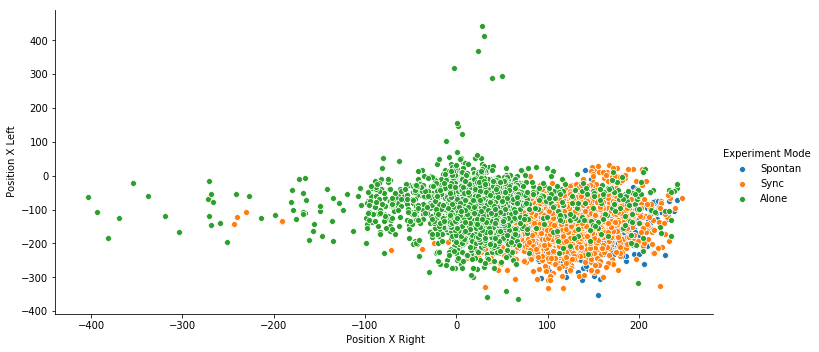

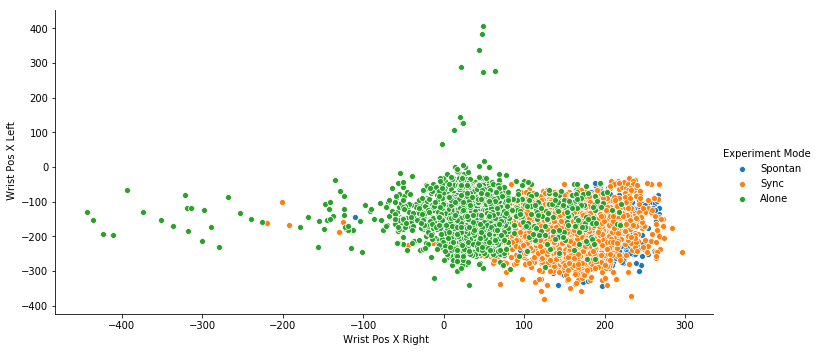

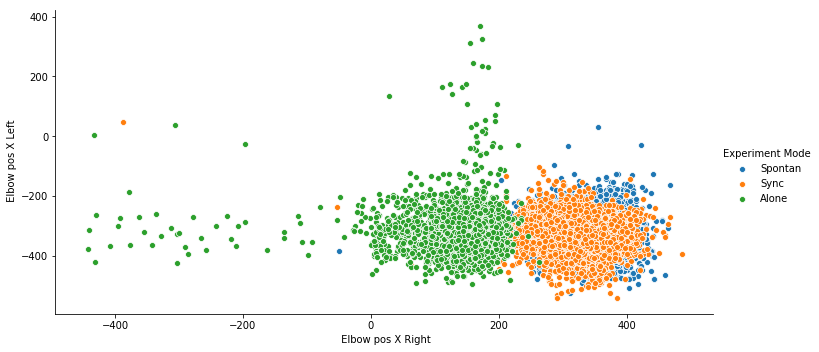

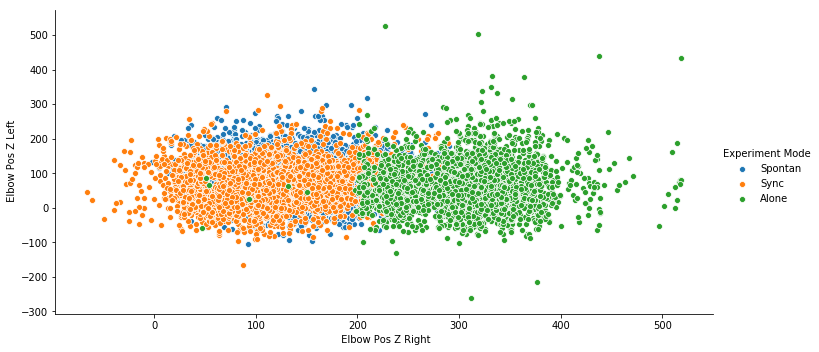

In [62]:
for x in [' Position X', ' Wrist Pos X', ' Elbow pos X', ' Elbow Pos Z']:
    ax = sns.pairplot(data=temp, hue='Experiment Mode', x_vars=[x+' Right'], y_vars=[x+' Left'], 
                      height=5, aspect=2);
    plt.show()

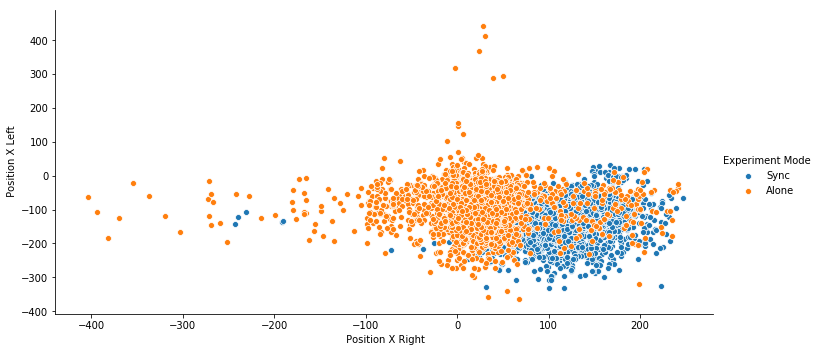

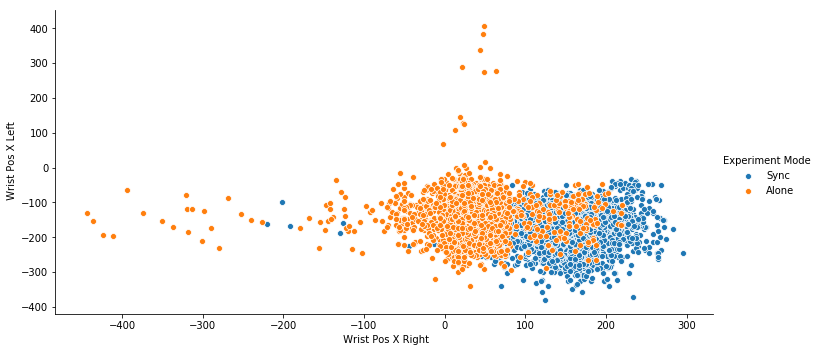

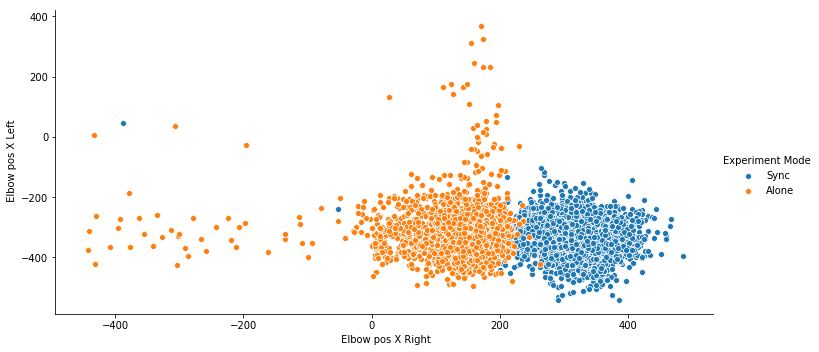

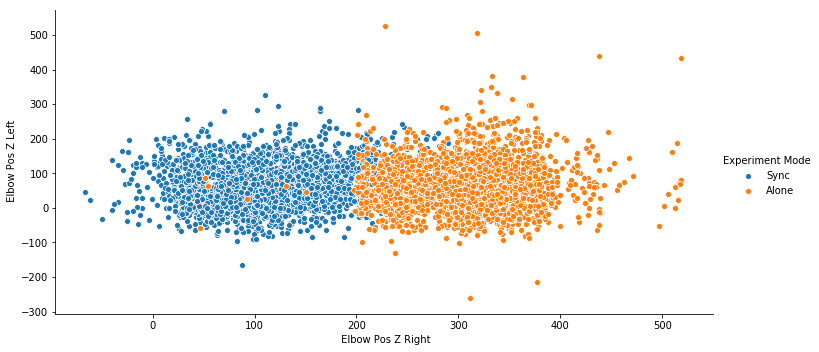

In [63]:
temp2 = temp[temp['Experiment Mode'] != 'Spontan' ].copy()
for x in [' Position X', ' Wrist Pos X', ' Elbow pos X', ' Elbow Pos Z']:
    ax = sns.pairplot(data=temp2, hue='Experiment Mode', x_vars=[x+' Right'], y_vars=[x+' Left' ], 
                      height=5, aspect=2);
    plt.show()

In [64]:
df0 = pd.DataFrame(columns=final_temp_df.columns.values)
HandRight0 = HandRight.copy()
NameCunter = 0
for x in TrainingPeopleFolders:
    PersonTrainingFiles = glob.glob(TrainingPath +x+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            HandRight0 = nogg(HandRight0.iloc[1:])
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        df0 = df0.append(df.dropna())
        df0 = nogg(df0)

In [65]:
df0.sample(10)

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
1557,9,2,-78.25436,175.41920,282.59450,272.6780,33.411380,-16.69986,-37.805610,-124.78300,...,100.575700,81.15089,0.000000,0.0,0.000000,0.838707,0.000000,0.122342,648.2988,49871
305,2,1,-187.62770,77.52228,243.09610,213.1588,24.352620,68.70171,-39.199340,-22.23178,...,30.816050,116.43180,0.000000,0.0,0.000000,0.252064,0.000000,0.000000,306.5941,36347
1050,5,1,-110.70700,117.30210,193.11420,205.9165,120.250100,29.11165,239.993500,-50.79488,...,172.424800,61.03800,0.000000,0.0,0.351733,0.011187,0.000000,0.000000,683.1118,79406
852,4,2,-106.48440,145.29380,221.47100,264.8724,51.423370,-12.59220,-86.965700,171.39080,...,17.873840,123.85230,0.000000,0.0,1.055008,0.000000,0.433660,0.000000,449.2561,52327
225,1,0,-50.59413,-78.97346,190.24640,286.9850,30.532590,17.75841,-63.502770,-63.70105,...,-41.991370,374.43900,1.000000,0.0,3.141593,0.315677,0.615102,0.000000,591.3824,157984
1099,6,2,-72.66470,139.74970,157.15260,146.6920,-13.201890,-22.61309,-8.079667,-76.87311,...,153.588800,192.29810,0.000000,0.0,0.000000,0.295748,0.000000,0.000000,442.3405,53550
885,4,1,-89.03651,88.97303,280.38490,291.5339,-1.451238,-21.03633,-37.654280,204.22990,...,-4.370307,41.97764,0.000000,0.0,0.216839,0.000000,0.000000,0.000000,530.5255,61679
499,3,0,-176.57680,51.61821,257.30530,239.4651,-0.066521,72.64493,-33.340480,98.70004,...,71.012050,317.90940,0.067958,0.0,1.504516,0.095588,0.193099,0.000000,187.9032,21730
1004,5,2,-103.46710,132.85980,194.29480,136.4820,68.919710,18.88722,31.705430,-7.64148,...,115.779800,163.16560,0.000000,0.0,0.000000,0.397929,0.000000,0.000000,580.7136,67620
727,4,2,-113.80660,152.66620,85.36721,206.8936,66.874410,10.71195,-161.621600,-63.86832,...,57.557520,207.49560,0.000000,0.0,0.219774,0.675387,0.000000,0.000000,156.6968,18665


In [67]:
temp = df0[df0['Experiment Mode'] < 2 ].copy()

In [68]:
TestDf = pd.DataFrame(columns=final_temp_df.columns.values)

In [69]:
TestingPeopleFolders = ['\Itiel Lab', '\Mor SHerman', '\Oded Medina']

In [70]:
TestingPath = r'C:\Users\user\Desktop\Exel files\semester_2_final\Validation'

In [71]:
for x in TestingPeopleFolders:
    PersonTrainingFiles = glob.glob(TestingPath +x+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            HandRight0 = nogg(HandRight0.iloc[1:])
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        TestDf = TestDf.append(df.dropna())
        TestDf = nogg(TestDf)

In [72]:
TestDf.head()

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
0,10,2,-153.1340,127.10290,192.9331,113.2914,42.375790,-24.740110,1.381898,46.23573,...,164.8990,255.7975,0.000000,0.000000,1.189606,0.289280,0.953943,0.0,785.2020,91809
1,10,2,-150.7764,103.38350,212.8092,158.4330,82.541620,3.589153,1.788826,33.73442,...,139.6354,209.5739,0.375480,0.505153,1.828708,1.497572,1.000000,0.0,786.8586,91999
2,10,2,-155.8001,85.03840,217.7303,172.7979,58.783540,167.849700,-15.920980,-54.91750,...,153.2142,128.5014,0.000000,0.000000,0.258431,0.399461,0.000000,0.0,788.5157,92190
3,10,2,-187.6501,94.30372,229.0524,177.8015,-0.015033,50.681560,-297.604100,-28.44757,...,153.4100,206.2453,0.000000,0.000000,0.486673,0.059221,0.000000,0.0,790.1719,92381
4,10,2,-209.8004,89.24201,206.0219,124.7721,32.160640,75.221330,17.331460,44.19484,...,165.7391,190.2260,0.339692,0.000000,1.769297,0.184421,0.000000,0.0,791.8286,92572


In [73]:
TestDf.tail()

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
262,12,1,-110.04700,142.49170,176.7309,182.0805,27.73928,21.52440,55.98376,8.009209,...,168.7757,49.80804,0.204791,0.003321,1.238284,0.942244,0.0,0.0,983.3909,64910
263,12,1,-109.46550,155.03590,254.2530,247.4207,22.20173,52.66084,-12.68165,-80.878160,...,122.9885,63.29292,0.000000,0.087941,0.000000,1.037282,0.0,0.0,986.7185,65181
264,12,1,-103.27160,151.31940,185.6855,227.0199,59.69488,37.33903,33.80912,-40.039060,...,182.6798,256.42920,0.000000,0.000000,0.074942,0.232789,0.0,0.0,990.0511,65460
265,12,1,-46.92138,77.94127,188.5445,359.3315,52.00124,85.64827,179.81920,12.357730,...,223.8153,204.70150,0.000000,0.000000,0.051329,0.175052,0.0,0.0,993.3839,65757
266,12,1,-89.85456,102.23720,264.3410,228.2804,57.19700,96.24442,131.89820,-28.327820,...,164.1666,130.68660,0.000000,0.000000,0.348894,0.000000,0.0,0.0,996.7189,66037


In [74]:
X_train = df0.drop(['Experiment Mode'],axis=1)
y_train = df0['Experiment Mode']
y_train = y_train.astype('int')
X_test = TestDf.drop(['Experiment Mode'],axis=1)
y_test = TestDf['Experiment Mode']
y_test = y_test.astype('int')

In [75]:
LR = LogisticRegression() 
LR.fit(X_train,y_train)
Accuracy = LR.score(X_test,y_test)
print('LR Accuracy:',get_precnt(Accuracy))

LR Accuracy: 85.39%


In [76]:
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
Accuracy = nb.score(X_test,y_test)
print('GaussianNB Accuracy:',get_precnt(Accuracy))

GaussianNB Accuracy: 81.27%


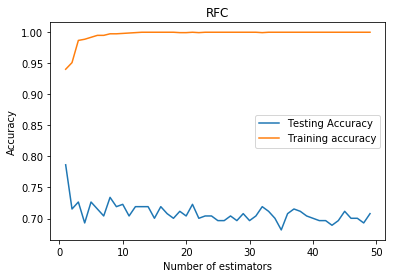

RFC Accuracy: 78.65%


In [77]:
estimators = np.arange(1,50)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    RFC = RandomForestClassifier(n_estimators=k)
    RFC.fit(X_train, y_train)
    train_accuracy[i] = RFC.score(X_train, y_train)
    test_accuracy[i] = RFC.score(X_test, y_test)
    
plt.title('RFC')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('RFC Accuracy:',get_precnt(test_accuracy.max()))

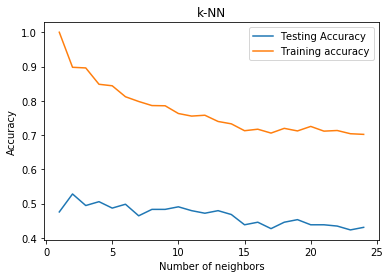

knn Accuracy: 52.8%


In [78]:
neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
print('knn Accuracy:',get_precnt(test_accuracy.max()))

In [79]:
SVM = svm.SVC()
SVM.fit(X_train, y_train) 
Accuracy = SVM.score(X_test,y_test)
print('SVM Accuracy:',get_precnt(Accuracy))

SVM Accuracy: 33.33%


In [80]:
df_train = df0.drop(['Experiment Mode'],axis=1).copy()
df_test = TestDf.drop(['Experiment Mode'],axis=1).copy()

scaler = StandardScaler()
scaler.fit(df_train)
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

pca = PCA()
pca.fit(df_train)
df_train = pca.transform(df_train)
df_test = pca.transform(df_test)

In [81]:
SVM = svm.SVC()
SVM = SVM.fit(df_train, y_train) 
Accuracy = SVM.score(df_test,y_test)
print('SVM Accuracy:',get_precnt(Accuracy))

SVM Accuracy: 94.38%


In [82]:
LR = LogisticRegression() 
LR.fit(df_train,y_train)
Accuracy = LR.score(df_test,y_test)
print('LR Accuracy:',get_precnt(Accuracy))

LR Accuracy: 91.01%


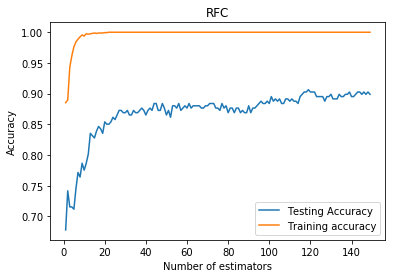

RFC Accuracy: 90.63%


118

In [83]:
estimators = np.arange(1,150)
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

for i,k in enumerate(estimators):
    RFC = RandomForestClassifier(n_estimators=k, random_state=1)
    RFC.fit(df_train, y_train)
    train_accuracy[i] = RFC.score(df_train, y_train)
    test_accuracy[i] = RFC.score(df_test, y_test)
    
plt.title('RFC')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('RFC Accuracy:',get_precnt(test_accuracy.max())) 
test_accuracy.argmax()

In [84]:
RFC = RandomForestClassifier(n_estimators=119, random_state=3)
RFC.fit(df_train, y_train)
Accuracy = RFC.score(df_test,y_test)
print('RFC Accuracy:',get_precnt(Accuracy))

RFC Accuracy: 86.14%


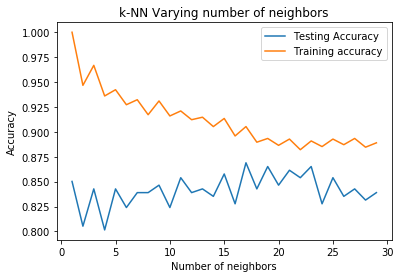

knn Accuracy: 86.89%


In [85]:
neighbors = np.arange(1,30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_train, y_train)
    train_accuracy[i] = knn.score(df_train, y_train)
    test_accuracy[i] = knn.score(df_test, y_test)
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
print('knn Accuracy:',get_precnt(test_accuracy.max()))  

In [86]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(df_train, y_train)
Accuracy = knn.score(df_test,y_test)
print('knn Accuracy:',get_precnt(Accuracy)) 

knn Accuracy: 86.89%


In [87]:
nb = GaussianNB()
nb = nb.fit(df_train, y_train)
Accuracy = nb.score(df_test,y_test)
print( 'GaussianNB Accuracy:',get_precnt(Accuracy))

GaussianNB Accuracy: 76.4%


In [88]:
SVM = svm.SVC()
LR = LogisticRegression()
RFC = RandomForestClassifier(n_estimators=108, random_state=3)
Voting = VotingClassifier(estimators=[('SVM', SVM), ('RFC', RFC), ('LR', LR)], voting='hard') #('KNN', KNN), 
Voting = Voting.fit(df_train, y_train)
Accuracy = Voting.score(df_test, y_test)
print('Voting Accuracy: ',get_precnt(Accuracy))

Voting Accuracy:  94.38%


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
print('model = SVM:')
SVM = svm.SVC()
SVM = SVM.fit(df_train, y_train) 
print(classification_report(y_test, SVM.predict(df_test), target_names=['Alone      ', 'Sync       ', 'Spontan    ']))
print('model = Voting:')
SVM = svm.SVC()
LR = LogisticRegression()
RFC = RandomForestClassifier(n_estimators=108, random_state=3)
Voting = VotingClassifier(estimators=[('SVM', SVM), ('RFC', RFC), ('LR', LR)], voting='hard') #('KNN', KNN), 
Voting = Voting.fit(df_train, y_train)
print(classification_report(y_test, Voting.predict(df_test), target_names=['Alone      ', 'Sync       ', 'Spontan    ']))

model = SVM:
             precision    recall  f1-score   support

Alone             1.00      1.00      1.00        89
Sync              0.91      0.92      0.92        89
Spontan           0.92      0.91      0.92        89

avg / total       0.94      0.94      0.94       267

model = Voting:
             precision    recall  f1-score   support

Alone             1.00      1.00      1.00        89
Sync              0.90      0.93      0.92        89
Spontan           0.93      0.90      0.91        89

avg / total       0.94      0.94      0.94       267



C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [90]:
def what_status(array):
    cunt_0 = 0
    cunt_1 = 0
    cunt_2 = 0
    for i in range(0,len(array)):
        if(array[i] == 0):
            cunt_0 = cunt_0+1
        if(array[i] == 1):
            cunt_1 = cunt_1+1
        if(array[i] == 2):
            cunt_2 = cunt_2+1
#     print(cunt_0, cunt_1, cunt_2)
    if((cunt_0 > cunt_1) & (cunt_0 > cunt_2)):
        return "Alone"
    if((cunt_1 > cunt_0) & (cunt_1 > cunt_2)):
        return "Sync"
    if((cunt_2 > cunt_0) & (cunt_2 > cunt_1)):
        return "Spontan"
    else:
        return "can't dicide"

In [91]:
for i in TestingPeopleFolders:
    PersonTrainingFiles = glob.glob(TestingPath +i+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        ddf = pd.DataFrame(columns=final_temp_df.columns.values)
        ddf = ddf.append(df.dropna())
        y = ddf['Experiment Mode']
        y = y.astype('int')
        x = ddf.drop(['Experiment Mode'], axis=1)
        x = scaler.transform(x)
        x = pca.transform(x)
        SVM = svm.SVC()
        SVM = SVM.fit(df_train, y_train)
        Accuracy = SVM.score(x,y)
        print(SVM.predict(x))
        if 'Alone' in filename:
            print('Alone')
        elif 'Sync' in filename:
            print('Sync')
        else:
            print('Spontan')
        print('SVM Accuracy:', get_precnt(Accuracy))
        if what_status(SVM.predict(x)) in filename: 
            print ("The model is right")
        else:             
            print ("The model is wrong")
        print(" ")

[2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2]
Spontan
SVM Accuracy: 89.18%
The model is right
 
[1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Sync
SVM Accuracy: 94.59%
The model is right
 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
SVM Accuracy: 100.0%
The model is right
 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Spontan
SVM Accuracy: 100.0%
The model is right
 
[1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Sync
SVM Accuracy: 91.89%
The model is right
 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
SVM Accuracy: 100.0%
The model is right
 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
SVM Accuracy: 100.0%
The model is right
 
[1 2 2 1 2 1 2 2 2 2 1 2 2 2 2]
Spontan
SVM Accuracy: 73.33%
The model is right
 
[1 1 1 1 1 1 1 1 1 1 1 1 2 2 1]
Sync
SVM Accuracy: 86.66%
The model is right
 


# Hope you enjoyed reading!!!